<a href="https://colab.research.google.com/github/Ravindrakumarnayak/Machine_learning/blob/main/naive_bias_pracitce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd


import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from wordcloud import STOPWORDS, WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [37]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re  # regular expression



In [38]:
import warnings

warnings.filterwarnings("ignore")

In [39]:
file="/content/spam.csv"

df=pd.read_csv(file, encoding='latin')

In [40]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [41]:
df.rename(columns={'v1':'class', 'v2':'text'}, inplace=True)
df

,class,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [42]:
df.drop(df.filter(regex="Unnamed"), axis=1, inplace=True)

In [43]:
df

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [44]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [45]:
df["label"]=df['class'].map({'spam':1, "ham":0})

In [46]:
df

,class,text,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [47]:
df['length']=df['text'].apply(len)

In [48]:
df

,class,text,label,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

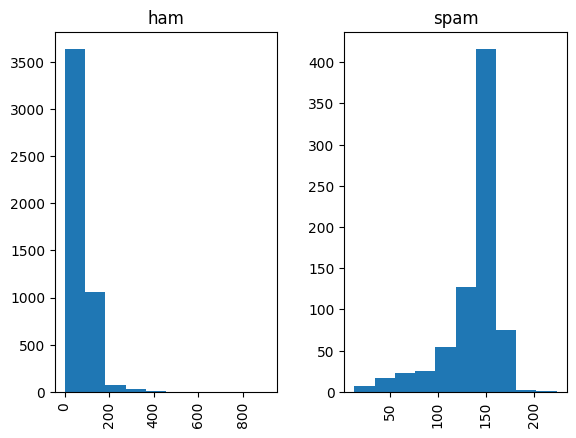

In [49]:
df.hist(column='length', by = 'class')

In [50]:
# length of spam is more than ham

In [51]:
spam=df[df['label']==1]
ham=df[df['label']==0]

In [52]:
spam

,class,text,label,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1,136
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1,90
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,160
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1,160
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1,147


In [53]:
ham

,class,text,label,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
6,ham,Even my brother is not like to speak with me. ...,0,77
...,...,...,...,...
5565,ham,Huh y lei...,0,12
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


In [54]:
spam.shape

(747, 4)

In [55]:
ham.shape

(4825, 4)

In [58]:
def wordcld(data,title):
  txt=" ".join(data['Text'])
  txt=txt.lower()
  stop=STOPWORDS

  wc=WordCloud(background_color='white',stopwords=stop).generate(txt)
  plt.imshow(wc)

  plt.axis('0ff')
  plt.title(title)
  plt.show()


In [60]:
wordcld(spam,"SPAM")


KeyError: ignored

In [61]:
wordcld(ham,'HAM')

KeyError: ignored

In [62]:
lemma= WordNetLemmatizer()

In [63]:
lemma

<WordNetLemmatizer>